In [149]:
from utils.summary_table_formatting import module_names_short, parameter_names_short
import pandas as pd


df_module_names = pd.DataFrame(list(module_names_short.items()), columns=['Original name', 'New name'])
df_parameter_names = pd.DataFrame(list(parameter_names_short.items()), columns=['Original', 'New name'])

df_parameter_names.to_csv('parameter_table.csv', index=False)

In [102]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = "coverage_rate_model_multi_parameter.nc"
variable_list = ['a_m']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = "coverage_rate_modules_multi"



transformations = {
    #'a_m': log_to_exp,
    #'b_p': log_to_exp,
    #'g_mp': log_to_exp

}

table_location = f"tables/{file_name}.csv"
image_location = f"posterior_distributions/{file_name}.pdf"


### Generate Summary object

In [103]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [104]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../multi_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'Coverage')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (16080, 24)
Parameter Matrix shape: (16080, 66)
Interaction Matrix shape: (16080, 1584)
Observation Matrix shape: (16080, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_m[da],801.855,10.509,785.936,819.350,0.290,0.206,1314.0,2882.0,1.0
a_m[config],809.267,10.547,792.527,826.364,0.297,0.210,1270.0,3282.0,1.0
a_m[maybe],1094.550,14.412,1071.195,1116.887,0.409,0.290,1243.0,3457.0,1.0
a_m[cmd],1189.724,15.584,1164.622,1214.412,0.441,0.312,1252.0,3237.0,1.0
a_m[immutable_list],1229.021,16.220,1202.822,1254.351,0.454,0.322,1279.0,3263.0,1.0
a_m[timer],1240.224,16.137,1214.533,1266.106,0.443,0.313,1331.0,3344.0,1.0
a_m[namedtupleutils],1328.897,17.252,1300.893,1356.276,0.480,0.340,1292.0,3351.0,1.0
a_m[dict_unpacking],1364.157,17.837,1335.660,1392.473,0.511,0.362,1218.0,3596.0,1.0
a_m[packages],1395.906,18.227,1366.867,1424.897,0.504,0.356,1311.0,3257.0,1.0
a_m[lazy_import],1423.644,18.584,1393.798,1453.484,0.520,0.368,1282.0,3022.0,1.0


### Save summary table as CSV

In [105]:
summary.to_csv(table_location, index=True)

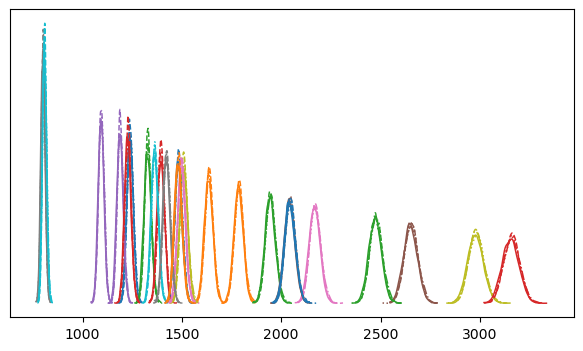

In [106]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()